In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import datetime as dt

### Parsing raw data - all India - Urban and Rural

In [ ]:
colspecs2 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(39,40),(40,41),(41,44),(44,45),(45,47),(47,49),(49,51),(126,129),(129,139)]
dfTUS2 = pd.read_fwf('TUS106_L02.txt', colspecs2)
columns2 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","RelationToHead","Gender","Age","MaritalStatus","Education", "PrincipleActivity","Industry of work","NSC", "Multiplier"]
dfTUS2.columns =  columns2

colspecs4 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(44,45),(45,46),(46,47),(126,129),(129,139)]
dfTUS4 = pd.read_fwf('TUS106_L04.txt', colspecs4)
columns4 = ["FSU", "Sector","State","District","Stratum", "Sub-stratum", "Sample HHID", "PersonID", "Day of the week", "Type of the day","Response code","NSC", "Multiplier"]
dfTUS4.columns =  columns4

colspecs5 = [(3,8),(15,16),(16,18),(19,21),(21,23),(23,25),(30,32),(36,39),(42,45),(45,50),(50,55),(55,56),(56,57),(57,58), (58,59), (58,60), (58,61),(61,62),(62,64),(64,65),(126,129),(129,139)]
dfTUS5 = pd.read_fwf('TUS106_L05.txt', colspecs5)                                                                                                               
columns5 = ["FSU", "Sector","State","District","Stratum","Sub-stratum","Sample HHID","PersonID","Serial no of activity", "Time from","Time to","MultiActivity","SimulActivity", "MajorActivity","Activity category", "Activity group","Activity code", "Where","Paid-unpaid","Type of enterprise","NSC", "Multiplier"]
dfTUS5.columns =  columns5

#### Filtering only rural India data and choosing the state of Maharashtra NSS code 27 

In [ ]:
dfTUS2 = dfTUS2[(dfTUS2.Sector == 2) & (dfTUS2.State == 27)]
dfTUS4 = dfTUS4[(dfTUS4.Sector == 2) & (dfTUS4.State == 27)]
dfTUS5 = dfTUS5[(dfTUS5.Sector == 2) & (dfTUS5.State == 27)]

dfTUS2.to_csv('MHTUS2.csv')
dfTUS4.to_csv('MHTUS4.csv')
dfTUS5.to_csv('MHTUS5.csv')

#### Reading Maharashtra (rural) data

In [3]:
dfTUS2 = pd.read_csv('MHTUS2T.csv')
dfTUS4 = pd.read_csv('MHTUS4T.csv')
dfTUS5 = pd.read_csv('MHTUS5T.csv')

#### Assigning individual unique id

In [4]:


dfTUS2['id'] = dfTUS2.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS2 = dfTUS2.set_index('id')

dfTUS4['id'] = dfTUS4.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS4 = dfTUS4.set_index('id')

dfTUS5['id'] = dfTUS5.groupby(['FSU','District','Sample HHID','PersonID']).ngroup()
dfTUS5 = dfTUS5.set_index('id')

#### Merging demographic data 

In [5]:
## Demographic details analysis

TUS_merged = pd.merge(dfTUS2, dfTUS4, on = 'id')
#TUS_merged.isna().sum()
#TUS_merged.shape

#### Merging individual ids to their activity records

In [6]:
TUS_full = pd.merge(dfTUS5, TUS_merged, left_index=True, right_index = True)
TUS_full.index.nunique()


4190

#### Dropping rest of the columns not relevant to Time Use

In [7]:
col = ['FSU', 'Sector', 'State', 'District', 'Stratum',
       'Sub-stratum', 'Sample HHID', 'PersonID',
       'Paid-unpaid', 'Type of enterprise', 'NSC', 'Multiplier',
       'Unnamed: 0_x', 'FSU_x', 'Sector_x', 'State_x', 'District_x',
       'Stratum_x', 'Sub-stratum_x', 'Sample HHID_x', 'PersonID_x',
       'RelationToHead', 'Gender', 'Age', 'MaritalStatus', 'Education',
       'PrincipleActivity', 'Industry of work', 'NSC_x', 'Multiplier_x',
       'Unnamed: 0_y', 'FSU_y', 'Sector_y', 'State_y', 'District_y',
       'Stratum_y', 'Sub-stratum_y', 'Sample HHID_y', 'PersonID_y',
       'Day of the week', 'Type of the day', 'Response code', 'NSC_y',
       'Multiplier_y','Unnamed: 0']
    
TUS_MH = TUS_full.drop(columns = col, axis=1)
TUS_MH = TUS_MH.reset_index()
del(TUS_full)

In [8]:
TUS_MH["Activity group"]

0        91
1        83
2        93
3        92
4        18
         ..
89995    84
89996    75
89997    92
89998    71
89999    71
Name: Activity group, Length: 90000, dtype: int64

#### Identifying activity groups that are correlated to electricity usage

In [9]:
TUS_MH = TUS_MH[(TUS_MH["Activity group"] == 31) |
                    (TUS_MH["Activity group"] == 32) |
                    (TUS_MH["Activity group"] == 34) |
                    (TUS_MH["Activity group"] == 62) |
                    (TUS_MH["Activity group"] == 63) |
                    (TUS_MH["Activity code"] == 842) |
                    (TUS_MH["Activity code"] == 843) |
                    (TUS_MH["Activity group"] == 91) |
                    (TUS_MH["Activity group"] == 92) |
                    (TUS_MH["Activity group"] == 93) ]
#TUS_MH.head(20)
# 1 - 31 - Meal prep
# 2 - 32 - Cleaning and maintaining of dwelling
# 3 - 34 - Laundary
# 4 - 62 - Study at home
# 5 - 63 - non-formal education (includes audio visual/instrument)
# 6 - 842 - Mass media use (watching TV)
# 7 - 843 - Mass media use (Listening to radio)
# 8 - 92 - eating and drinking
# 9 - 93 - Personal care
# 10 - 91 - Sleeping and incidental naps

In [10]:
TUS_MH["Activity group"] = TUS_MH["Activity group"].replace({31:1,32:2,34:3,41:4,62:5,63:6,91:10,92:8,93:9})
TUS_MH["Activity group"]

0        10
2         9
3         8
6         8
9         9
         ..
89989    10
89990     9
89992     8
89995    84
89997     8
Name: Activity group, Length: 56750, dtype: int64

### Seperate TV and radio

In [11]:
TUS_MH["Activity group"] = TUS_MH["Activity code"].where(TUS_MH["Activity code"] == 842, TUS_MH["Activity group"].replace({84:7}))
TUS_MH["Activity group"] = TUS_MH["Activity code"].where(TUS_MH["Activity code"] == 843, TUS_MH["Activity group"].replace({84:7}))
(TUS_MH["Activity group"] == 842).value_counts()

False    47948
True      8802
Name: Activity group, dtype: int64

In [12]:
TUS_MH["Activity group"] = TUS_MH["Activity group"].replace({842:6, 843:7})


In [13]:
TUS_MH= TUS_MH[TUS_MH.Where == 1]
TUS_MH

,id,Unnamed: 0.1,Serial no of activity,Time from,Time to,MultiActivity,SimulActivity,MajorActivity,Activity category,Activity group,Activity code,Where
0,0,6893483,1,04:00,07:00,2.0,NaN,1,9,10,911,1
2,0,6893485,3,08:00,08:30,2.0,NaN,1,9,9,931,1
3,0,6893486,4,08:30,09:30,2.0,NaN,1,9,8,921,1
9,0,6893492,10,18:30,19:00,2.0,NaN,1,9,9,931,1
10,0,6893493,11,19:00,19:30,1.0,2.0,1,9,8,921,1
...,...,...,...,...,...,...,...,...,...,...,...,...
89989,4189,6983472,1,04:00,05:30,2.0,NaN,1,9,10,911,1
89990,4189,6983473,2,05:30,06:00,2.0,NaN,1,9,9,931,1
89992,4189,6983475,4,06:30,07:00,1.0,1.0,1,9,8,922,1
89995,4189,6983478,7,08:00,10:00,2.0,NaN,1,8,7,843,1


#### Converting time from and time to in datetime 

In [14]:
TUS_MH["Start_time"] = pd.to_datetime(TUS_MH['Time from'], format="%H:%M").dt.time
TUS_MH["End_time"] = pd.to_datetime(TUS_MH['Time to'], format="%H:%M").dt.time

### Timestamp shifting
- original data is entered in 4:00am to 4:00am format
- date time module calculates midnight to midnight 
- The issue was in calculating the entries which has sleeping activity from time 22:00 to 4:00 because of change of date
- the code below calculates the shift of time and fits all in 24 hour format 
- Other things tried are - pd.shift(), pd.tshift() and timedelta (none worked in hourly format that could potentially avoid negative time difference)

In [15]:
TUS_MH_new = pd.DataFrame(columns = TUS_MH.columns )
#for i in range(TUS_MH.index.nunique()): ## considering this will take too long run time
for i in range(30000):           ## so for trial taking 30000 entries ~ 2100 person ids
    if TUS_MH['Time to'].iloc[i] == "04:00":   ## if end time is 4:00 entries 
        temp_df = TUS_MH[i:i+1].copy()
        if not(TUS_MH['Time from'].iloc[i] == "00:00"):
            start_mn = TUS_MH['Start_time'].iloc[i].minute
            start_hr = TUS_MH['Start_time'].iloc[i].hour
            hr_diff = 24-start_hr
            n_half_hr = 2*hr_diff
            if start_mn == 30:
                n_half_hr = n_half_hr - 1
            if n_half_hr > 1:
                start_time0 = temp_df['Start_time'].iloc[0]
                for j in range(n_half_hr):
                    temp_df['Start_time'] = (dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*j)).time()
                    temp_df['End_time'] =(dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*(j+1))).time()
                    TUS_MH_new = pd.concat([TUS_MH_new,temp_df])
        n_half_hr = 8
        
        start_time0 = pd.to_datetime('00:00', format="%H:%M").time()
        for j in range(n_half_hr):
            temp_df['Start_time'] = (dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*j)).time()
            temp_df['End_time'] =(dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*(j+1))).time()
            TUS_MH_new = pd.concat([TUS_MH_new,temp_df])
    #################################################        
                
    else:    
        end_mn = TUS_MH['End_time'].iloc[i].minute
        end_hr = TUS_MH['End_time'].iloc[i].hour
        start_mn = TUS_MH['Start_time'].iloc[i].minute
        start_hr = TUS_MH['Start_time'].iloc[i].hour
        hr_diff = end_hr-start_hr
        min_diff = end_mn-start_mn
        if min_diff == -30:
            hr_diff = hr_diff - 1
            min_diff = 30
        n_half_hr = 2*hr_diff
        if min_diff == 30:
            n_half_hr = n_half_hr + 1
        if n_half_hr > 1:
            temp_df = TUS_MH[i:i+1].copy()
            start_time0 = temp_df['Start_time'].iloc[0]
            for j in range(n_half_hr):
                temp_df['Start_time'] = (dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*j)).time()
                temp_df['End_time'] =(dt.datetime.combine(dt.date(1,1,1),start_time0) + dt.timedelta(minutes=30*(j+1))).time()
                TUS_MH_new = pd.concat([TUS_MH_new,temp_df])

###############################################
TUS_MH_new = TUS_MH_new.reset_index()

In [17]:
TUS_MH_new

,index,id,Unnamed: 0.1,Serial no of activity,Time from,Time to,MultiActivity,SimulActivity,MajorActivity,Activity category,Activity group,Activity code,Where,Start_time,End_time
0,0,0,6893483,1,04:00,07:00,2.0,NaN,1,9,10,911,1,04:00:00,04:30:00
1,0,0,6893483,1,04:00,07:00,2.0,NaN,1,9,10,911,1,04:30:00,05:00:00
2,0,0,6893483,1,04:00,07:00,2.0,NaN,1,9,10,911,1,05:00:00,05:30:00
3,0,0,6893483,1,04:00,07:00,2.0,NaN,1,9,10,911,1,05:30:00,06:00:00
4,0,0,6893483,1,04:00,07:00,2.0,NaN,1,9,10,911,1,06:00:00,06:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69103,49759,2296,6943242,1,04:00,07:00,2.0,NaN,1,9,10,911,1,04:30:00,05:00:00
69104,49759,2296,6943242,1,04:00,07:00,2.0,NaN,1,9,10,911,1,05:00:00,05:30:00
69105,49759,2296,6943242,1,04:00,07:00,2.0,NaN,1,9,10,911,1,05:30:00,06:00:00
69106,49759,2296,6943242,1,04:00,07:00,2.0,NaN,1,9,10,911,1,06:00:00,06:30:00


<IPython.core.display.Javascript object>


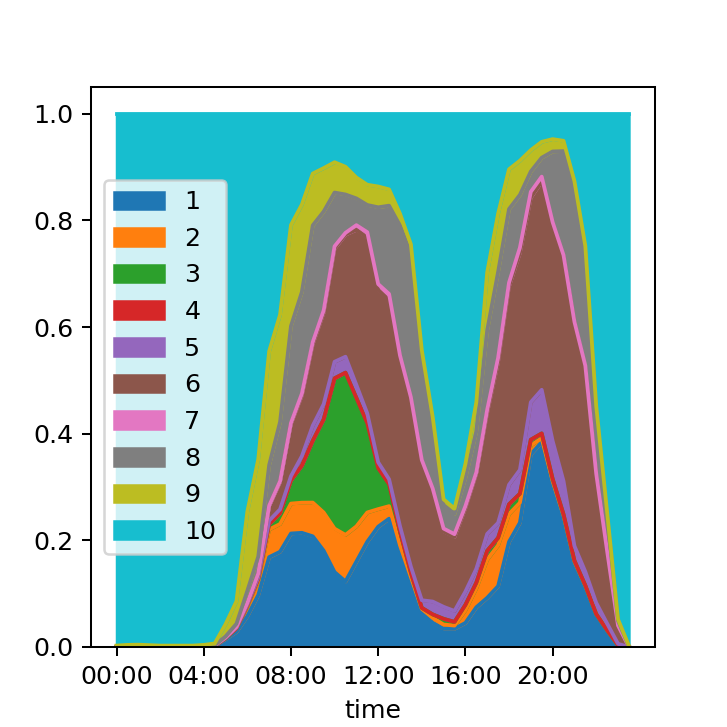

In [18]:
times = TUS_MH_new['Start_time'].unique()
times = np.sort(times)
prob_df = pd.DataFrame(index = times,columns = np.arange(1,11,1))
for time in times:
    dd1 = TUS_MH_new[TUS_MH_new['Start_time']==time]
    tot = dd1.shape[0]
    for gr in np.arange(1,11,1):
        prob_df[gr].loc[time] = dd1[dd1['Activity group']==gr].shape[0]/tot

prob_df.plot(kind = 'area', figsize=(4,4));
plt.xticks([dt.time(hour=i) for i in np.arange(0,24,4)])
plt.show(); 

<IPython.core.display.Javascript object>


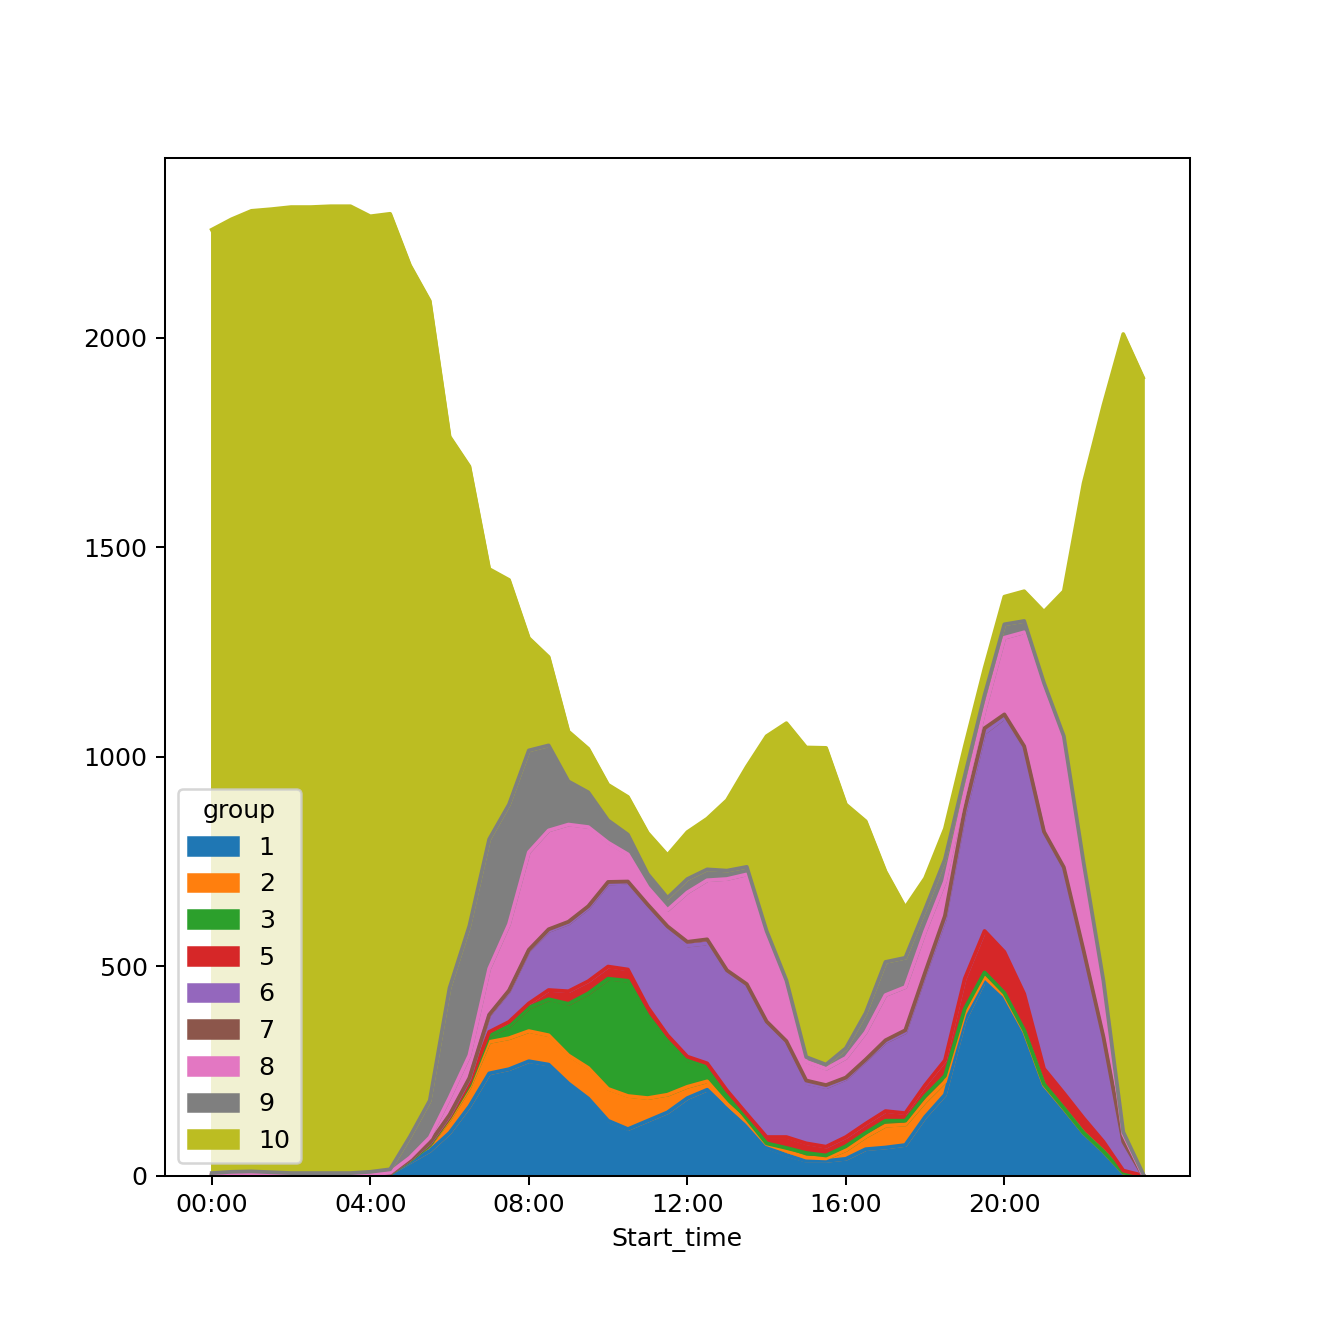

In [19]:
occ = TUS_MH_new
occ.loc[:,('group')] = occ.loc[:,('Activity group')]
occ = occ.groupby(['Start_time', 'group']).count().reset_index()
occ.pivot('Start_time', 'group')['Activity group'].plot(kind='area', figsize=(4,4))
plt.xticks([dt.time(hour=i) for i in np.arange(0,24,4)])
plt.show()

In [20]:
times = TUS_MH_new['Start_time'].unique()
times = np.sort(times)
nt = times.shape[0]
transition_matrices = np.zeros([nt,10,10])
state_min = 1
state_max = 11
nstate_tot = state_max-state_min
for i in range(TUS_MH_new.index.nunique()-1):
#for i in range(10000):
    time_stamp = TUS_MH_new['Start_time'].iloc[i]
    state_t = TUS_MH_new['Activity group'].iloc[i]
    state_t1 = TUS_MH_new['Activity group'].iloc[i+1]
    timepos = np.where(times == time_stamp)[0][0]
    transition_matrices[timepos,state_t-1,state_t1-1] += 1
    
for i in range(nt):
    for j in range(nstate_tot):
        tot = transition_matrices[i,j,:].sum()
        if(tot >0):
            transition_matrices[i,j,:] = transition_matrices[i,j,:]/tot


<IPython.core.display.Javascript object>


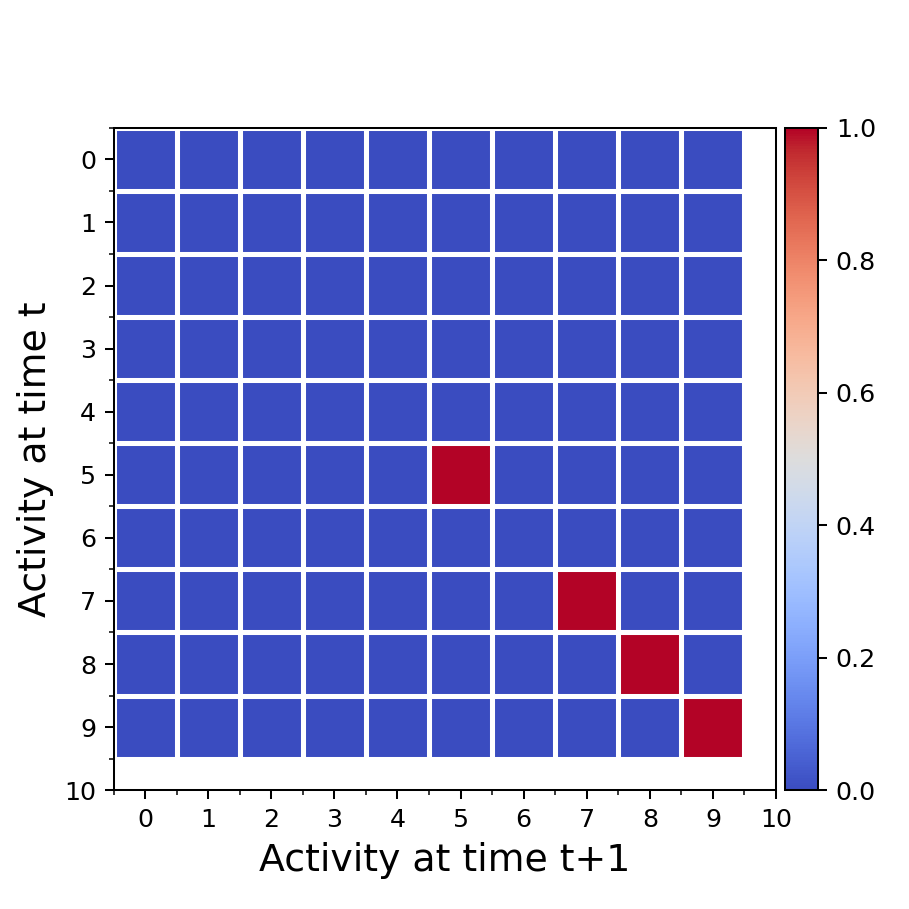

In [21]:
###### Plotting transition matrix ########

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111)
im = ax.imshow(transition_matrices[0], interpolation='none', vmin=0, vmax=1, aspect='equal', cmap='coolwarm');
#fig.colorbar(im)
ax = plt.gca();
ax = plt.gca();

# Major ticks
ax.set_xticks(np.arange(0, 11, 1));
ax.set_yticks(np.arange(0, 11, 1));

# Labels for major ticks
ax.set_xticklabels(np.arange(0, 11, 1));
ax.set_yticklabels(np.arange(0, 11, 1));

# Minor ticks
ax.set_xticks(np.arange(-.5, 10, 1), minor=True);
ax.set_yticks(np.arange(-.5, 10, 1), minor=True);
ax.grid(False)
# Gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

#Title
#ax.set_title("State transition matrix TV Plasma single day", y=1.03, fontsize = 15)

#Axes labels
ax.set_xlabel('Activity at time t+1', fontsize = 15)
ax.set_ylabel('Activity at time t', fontsize=15)

#Color bar
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
#plt.show()
#plt.savefig('Activity Transition matrix.pdf')
#plt.show()

def animate(i):
    im.set_data(transition_matrices[i])
    return im
anim = FuncAnimation(fig, animate, frames=nt, interval=500)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
line, = ax.plot([])     # A tuple unpacking to unpack the only plotax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 6)
x = np.arange(0,6,0.1)
def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line
anim = FuncAnimation(fig, animate, frames=100, interval=20)
plt.show()